In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import datetime as datetime
import nltk
import seaborn
import csv
from bs4 import BeautifulSoup
from sklearn import datasets, linear_model
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from subprocess import check_output
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### convert string variable into float variable and calculate two new variable

In [3]:
def my_fun1(a,b):
    return float(a) - float(b) 

def my_fun2(a):
    return float(a)

MarketData = pd.read_csv('LabeledY.csv')
MarketData
MarketData['HighMinusLow'] = MarketData.apply(lambda x: my_fun1(x['High'],x['Low']),axis=1)
MarketData['CloseMinusOpen'] = MarketData.apply(lambda x: my_fun1(x['Adj Close'],x['Open']),axis=1)
MarketData['High'] = MarketData.apply(lambda x: my_fun2(x['High']),axis=1)
MarketData['Low'] = MarketData.apply(lambda x: my_fun2(x['Low']),axis=1)
MarketData['Open'] = MarketData.apply(lambda x: my_fun2(x['Open']),axis=1)
MarketData['Adj Close'] = MarketData.apply(lambda x: my_fun2(x['Adj Close']),axis=1)
MarketData['Daily Growth'] = MarketData.apply(lambda x: my_fun2(x['Daily Growth']),axis=1)
MarketData['LabledY'] = MarketData.apply(lambda x: my_fun2(x['LabledY']),axis=1)
MarketData
#MarketData.plot()

,Unnamed: 0,Attributes,High,Low,Open,Close,Volume,Adj Close,Daily Growth,LabledY,HighMinusLow,CloseMinusOpen
0,2,2016-09-26,2158.540039,2145.040039,2158.540039,2146.100098,3216170000,2146.100098,-0.005763,-1.0,13.500000,-12.439941
1,3,2016-09-27,2161.129883,2141.550049,2146.040039,2159.929932,3437770000,2159.929932,0.006472,1.0,19.579834,13.889893
2,4,2016-09-28,2172.399902,2151.790039,2161.850098,2171.370117,3891460000,2171.370117,0.004404,0.0,20.609863,9.520020
3,5,2016-09-29,2172.669922,2145.199951,2168.899902,2151.129883,4249220000,2151.129883,-0.008193,-1.0,27.469971,-17.770020
4,6,2016-09-30,2175.300049,2156.510010,2156.510010,2168.270020,4173340000,2168.270020,0.005453,0.0,18.790039,11.760010
5,7,2016-10-03,2164.409912,2154.770020,2164.330078,2161.199951,3137550000,2161.199951,-0.001446,0.0,9.639893,-3.130127
6,8,2016-10-04,2165.459961,2144.010010,2163.370117,2150.489990,3750890000,2150.489990,-0.005954,-1.0,21.449951,-12.880127
7,9,2016-10-05,2163.949951,2155.149902,2155.149902,2159.729980,3906550000,2159.729980,0.002125,0.0,8.800049,4.580078
8,10,2016-10-06,2162.929932,2150.280029,2158.219971,2160.770020,3461550000,2160.770020,0.001182,0.0,12.649902,2.550049
9,11,2016-10-07,2165.860107,2144.850098,2164.189941,2153.739990,3619890000,2153.739990,-0.004829,0.0,21.010010,-10.449951


### mean of stock data

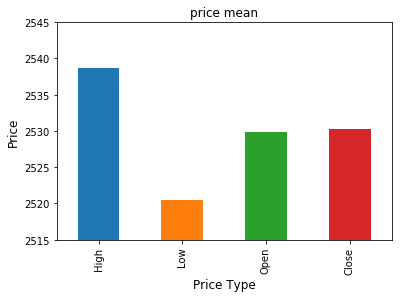

In [4]:
Market_Mean = MarketData.mean(axis=0)
Market_Mean_1 = Market_Mean[1:5]
ax = Market_Mean_1.plot(title='price mean', kind='bar')
ax.set_xlabel("Price Type",fontsize=12)
ax.set_ylabel("Price",fontsize=12)
plt.ylim(2515, 2545)
plt.show()